#Diamond Price Prediction

Dataset: https://drive.google.com/file/d/1bWH5tVVpk-FC7YXJOsFkl8b4em6GHuUp/view

##Business Understanding

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

Credits - https://www.brides.com/story/choosing-engagement-ring-four-cs

In [1]:
#Import Requirements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Load the Dataset
df=pd.read_csv(".\Data\diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#Data Description:

###Title: Diamonds Dataset

    1. The 7th column "price" is the values to be predicted.

    2. Data Type : Mixed ( Numerical + Categorical)

    3. Dataset has nearly 54000 instances.

    4. It has 10 features.

###Features:

    1. price : price in US dollars ($326--$18,823)

    2. carat : weight of the diamond (0.2--5.01)

    3. cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

    4. color : diamond colour, from J (worst) to D (best)

    5. clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

    6. x : length in mm (0--10.74)

    7. y : width in mm (0--58.9)

    8. z : depth in mm (0--31.8)

    9. depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

    10. table : width of top of diamond relative to widest point (43--95)

In [3]:
df.shape

(53940, 10)

#Exploratory Data Analysis

##Data Preprocesing

1. Data cleaning

2. Identifying and removing outliers

3. Encoding Categorical Variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##Point to notice:

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-D diamonds. So we need to filter out those as it clearly faulty data points. 

In [6]:
#dropping dimentionless diamonds
df=df.replace(0,np.NaN)
df.dropna(inplace=True)

In [7]:
#finding presence of null value
print(df.isnull().sum())
print(df.shape)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
(53920, 10)


###There are no null values present in this dataset and the rows which cointed 0 value are deleted. Moreover, the dimension of the data has now become 53920 rows with 10 features. Now let us rename the columns.

In [8]:
#renaming "x", "y", "z"
df.rename(columns={"depth": "depth%", "table": "table%", "x": "length", "y":"width", "z": "depth"},inplace=True)
df.head(1)

,carat,cut,color,clarity,depth%,table%,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


###Now, we can see that the length/width ratio information is not present in the dataset. However we have length and width information. Therefore, we will create nother column called L/W ratio by dividing the length by width and see how it correlates with our other features later.

In [9]:
df['L/W']=df['length']/df['width']
df.head(1)

,carat,cut,color,clarity,depth%,table%,price,length,width,depth,L/W
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462


In [10]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth%       184
table%       127
price      11597
length       553
width        550
depth        374
L/W         7580
dtype: int64

##There are 4 main features (also known s 4 C's) which are used to access the quality of a diamond, are listed down below.

1. Carat Weight (Numeric) 
2. Cut (categorical)
3. Clarity (categorical)
4. Color (categorical)

In [11]:
print("Cut:", df["cut"].unique().tolist())
print("Clarity:", df["clarity"].unique().tolist())
print("Color:", df["color"].unique().tolist())

Cut: ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Clarity: ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Color: ['E', 'I', 'J', 'H', 'F', 'G', 'D']


###From the above output, we can confirm that each of these categorical values is based on AGS scaling grade. Not the GIA. However, some of the categorical values are not present in the data such as color values from k to z, clarity values such as I2 and I3, and also poor cu values are not there.

##Analysing using Histplot

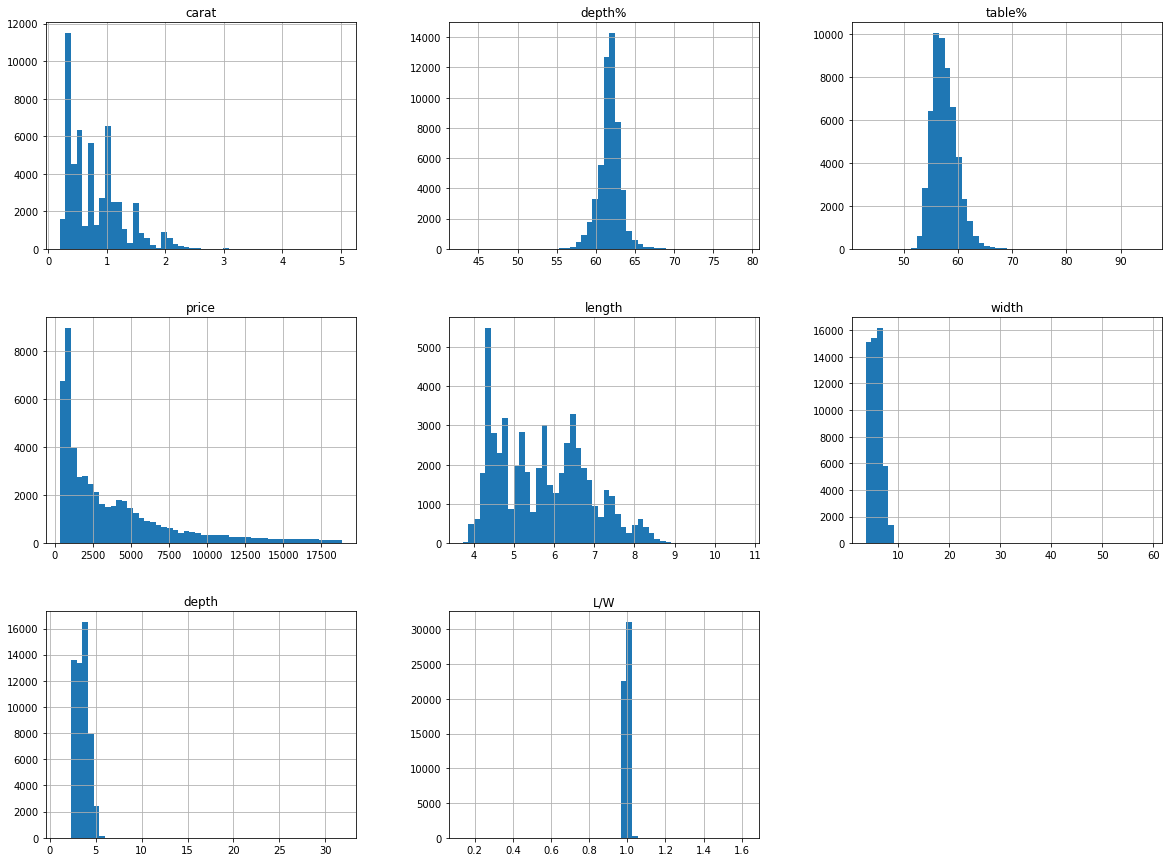

In [12]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

###Plot the distributions of numerical attributes by using hist() method

#Pairplot of Data

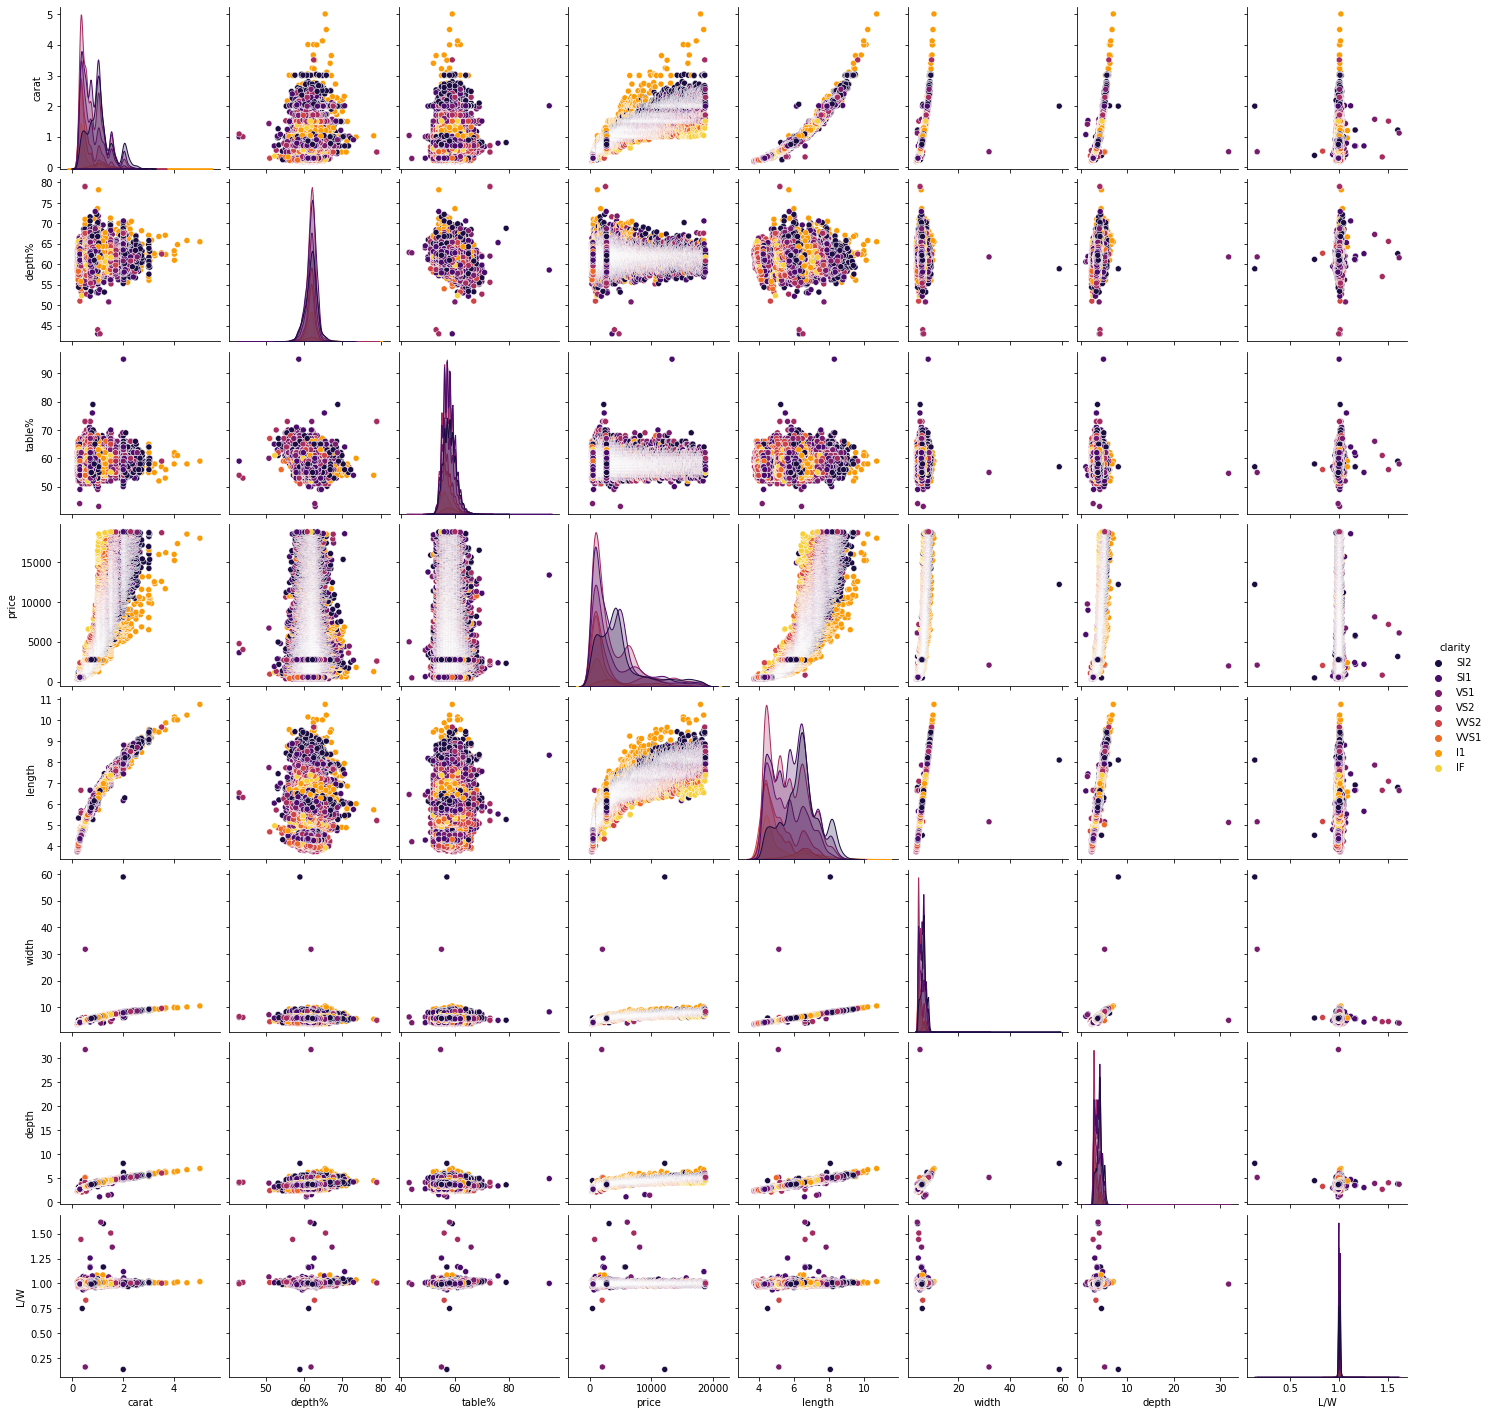

In [13]:
#let's have a look at data based on clarity 
ax=sns.pairplot(df, hue="clarity",palette='inferno')


###There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

1. "width" and "depth" have some dimensional outlies in our dataset that needs to be eliminated.
2. The "depth%" should be capped but we must examine the regression line to be sure.
3. The "table" featured should be capped too.
4. Let's have a look at regression plots to get a close look at the outliers.

#Analysics Numerical Columns 

Text(0.5, 1.0, 'Regression Line on price VS length')

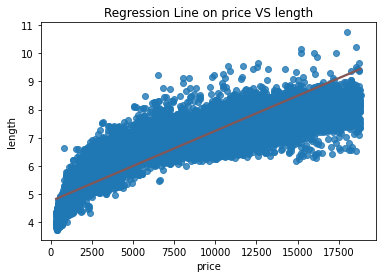

In [14]:
#price Vs length
ax=sns.regplot(x="price", y="length",data=df, fit_reg=True, line_kws={"color":"#835656"})
ax.set_title("Regression Line on price VS length")

###df["length"] > 10 are considered as outliers

Text(0.5, 1.0, 'Regression Line on price VS Width')

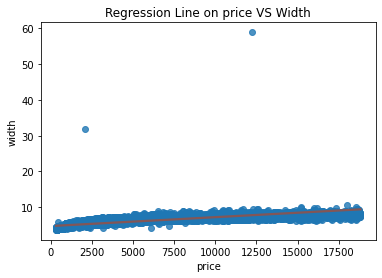

In [15]:
#price Vs Width
ax=sns.regplot(x="price", y="width",data=df, fit_reg=True, line_kws = {"color":"#835656"})
ax.set_title("Regression Line on price VS Width")

###df["width"] > 30 are considered as outliers

Text(0.5, 1.0, 'Regression Line on price VS depth')

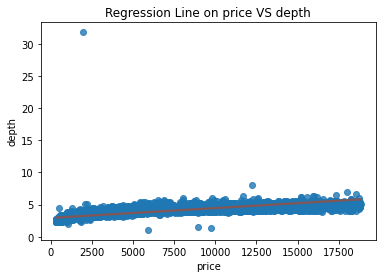

In [16]:
#price Vs depth
ax=sns.regplot(x="price", y="depth",data=df, fit_reg=True, line_kws={"color": "#835656"})
ax.set_title("Regression Line on price VS depth")

###df["depth"] > 30 are considered as outliers

Text(0.5, 1.0, 'Regression Line on price VS depth%')

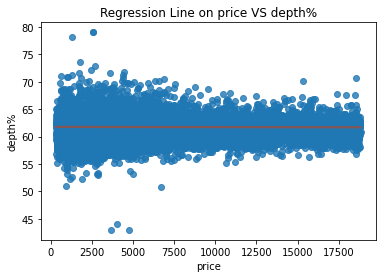

In [17]:
#price Vs depth%
ax=sns.regplot(x="price", y="depth%",data=df, fit_reg=True, line_kws= {"color": "#835656"})
ax.set_title("Regression Line on price VS depth%")

###df["depth%"] < 45 and df["depth%"] > 75 are considered as outliers

Text(0.5, 1.0, 'Regression Line on price VS table%')

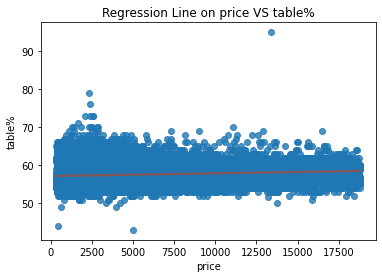

In [18]:
#price Vs table%
ax=sns.regplot(x="price", y="table%",data=df, fit_reg=True, line_kws={"color": "#835656"})
ax.set_title("Regression Line on price VS table%")

###df["table%"] < 40 and df["table%"] > 80 are considered as outliers

Text(0.5, 1.0, 'Regression Line on price VS carat')

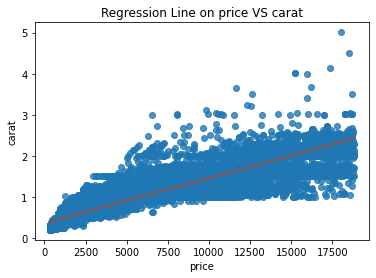

In [19]:
#price Vs carat
ax=sns.regplot(x="price", y="carat",data=df, fit_reg=True,line_kws={"color": "#835656"})
ax.set_title("Regression Line on price VS carat")

###df["carat"] > 3 are considered as outliers

###We can clearly spot outliers in these attributes. Next up, we will remove these data points.

In [20]:
#Dropping the outliers. 
df = df[(df["carat"]<3)]
df = df[(df["length"]<10)]
df = df[(df["width"]<30)]
df = df[(df["depth"]<30)]
df = df[(df["depth%"]<75) & (df["depth%"]>45)]
df = df[(df["table%"]<80) & (df["table%"]>40)]
df.shape

(53870, 11)

#Analysing Categorical Columns

In [21]:
#Get list of categorical variable
s=(df.dtypes=="object")
obj_cols=list(s[s].index)
print("Categorical Variables:\n ",obj_cols)

Categorical Variables:
  ['cut', 'color', 'clarity']


Text(0.5, 0, 'cut')

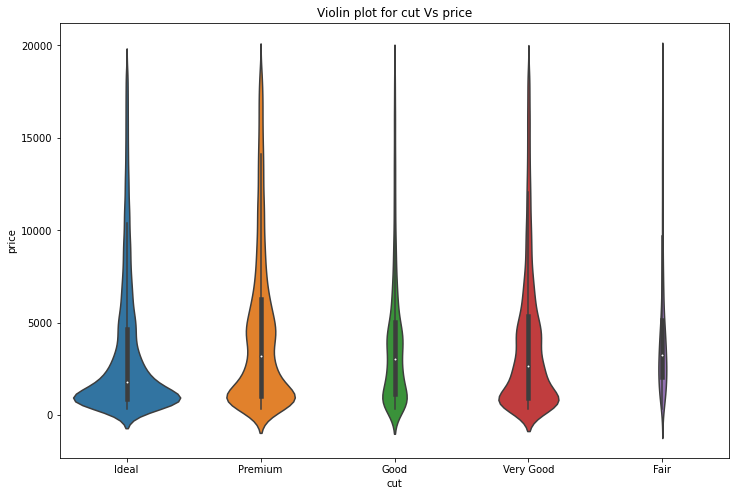

In [22]:
#price vs cut
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="cut",y="price",data=df,palatte='inferno', scale="count")
ax.set_title("Violin plot for cut Vs price")
ax.set_ylabel("price")
ax.set_xlabel("cut")

Text(0.5, 0, 'clarity')

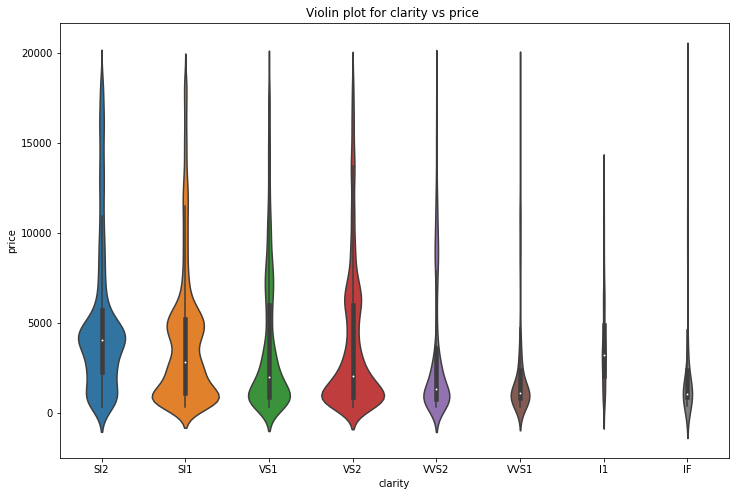

In [23]:
#price vs clarity
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="clarity", y="price", data=df, palatte='inferno',scale="count")
ax.set_title("Violin plot for clarity vs price ")
ax.set_ylabel("price")
ax.set_xlabel("clarity")

Text(0, 0.5, 'price')

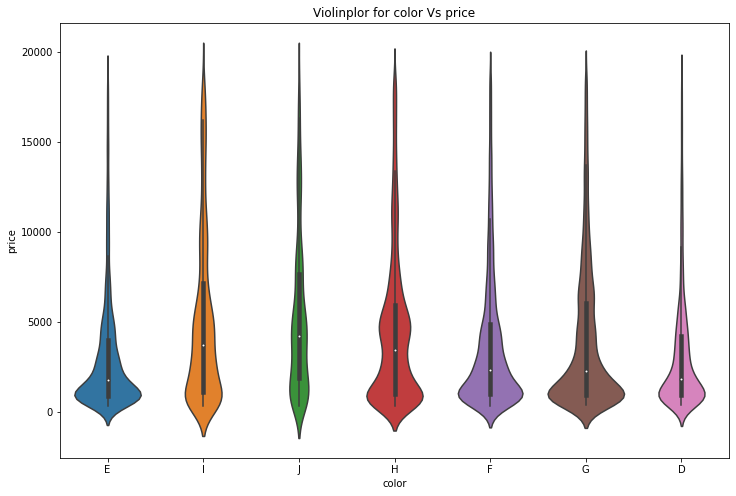

In [24]:
#price Vs Color
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="color", y="price", data=df,palatte="inferno", scale="count")
ax.set_title("Violinplor for color Vs price")
ax.set_xlabel("color")
ax.set_ylabel("price")

#Analysig using heatmap

<AxesSubplot: >

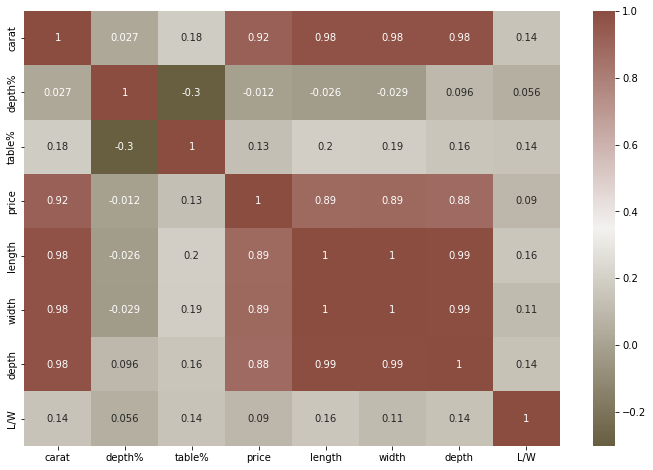

In [25]:
#correlation matrix
cmap=sns.diverging_palette(70,20, s=50,l=40,n=6,as_cmap=True)
corrmat=df.corr()
f,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corrmat,cmap=cmap,annot=True)

##Points to notice:

1. "carat", "length", "width" and "depth" show a high correlation to the target column.

2. "depth%" and "table%" show low correlation. 

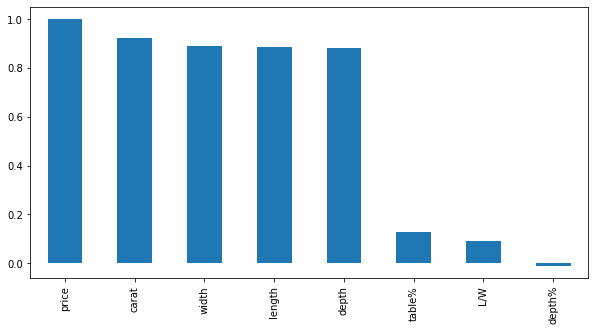

In [26]:
corr_mat = df.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

###We can conclude that carat, length, width and depth features have strong correlation w.r.t price variable and depth% has a very weak relation w.r.t price variable. Hence, we can drop the depth% feature from the final list of input features to the model.

In [27]:
#Droping the depth column
df= df.drop("depth%", axis =1)
df.head()

,carat,cut,color,clarity,table%,price,length,width,depth,L/W
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75,0.997701


#Model Building

##Steps involved in Model Building

1.  Identify the Target Variable and Splitting the Data into train and test
2. Data Preparation - train-test Split, Normalisation or Rescaling
3. Fit all the models on training data
4. Evaluate the best model for production


In [28]:
# Assigning the featurs as X and trarget as y
X= df.drop(["price"],axis =1)
y= df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40402, 9) (40402,)
(13468, 9) (13468,)


##Data Preprocessing on Training Data

###Processing Numerical columns

In [30]:
#train data for numerical columns
X_train_num= X_train.select_dtypes(include=['int64','float64'])

In [31]:
#scaling the train numerical solumns 
scaler= StandardScaler()
X_train_num_rescaled= pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

In [32]:
#preparing test data on numerical columns
X_test_num= X_test.select_dtypes(include=['int64','float64'])

In [33]:
#scaling the test numerical columns
X_test_num_rescaled= pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

###Processing Categorical columns

In [34]:
#train and test data for categorical columns
X_train_cat= X_train.select_dtypes(include=['object'])

In [35]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
34500
51243
28000
4938
10162


In [36]:
X_train_cat.color.unique()

array(['I', 'H', 'E', 'F', 'G', 'D', 'J'], dtype=object)

In [37]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()

,color
34500,2
51243,3
28000,6
4938,3
10162,5


In [38]:
X_train_cat.cut.unique()

array(['Good', 'Ideal', 'Very Good', 'Premium', 'Fair'], dtype=object)

In [39]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,color,cut
34500,2,2
51243,3,4
28000,6,3
4938,3,3
10162,5,4


In [40]:
X_train_cat.clarity.unique()

array(['VVS1', 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'I1', 'IF'],
      dtype=object)

In [41]:
clarity_encoder ={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,color,cut,clarity
34500,2,2,7
51243,3,4,3
28000,6,3,4
4938,3,3,2
10162,5,4,3


###preparing test data on catgorical columns

In [42]:
X_test_cat= X_test.select_dtypes(include=['object'])

In [43]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)

In [44]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
51005,5,4,5
40383,2,3,3
36845,5,5,4
3187,4,4,5
1299,4,7,3


###Concatinating the Encoded Categorical Features and Rescaled Numerical Features ON Train data:

In [45]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,table%,length,width,depth,L/W,color,cut,clarity
34500,-0.802295,1.586627,-0.763118,-0.743201,-0.927143,-0.547667,2,2,7
51243,-0.163290,-1.553821,0.043844,0.015281,0.074552,0.570691,3,4,3
28000,-1.057898,-0.207914,-1.310059,-1.294003,-1.261041,-0.633243,6,3,4
4938,0.390516,0.689356,0.536987,0.593173,0.597175,-0.871473,3,3,2
10162,0.539617,-0.207914,0.698380,0.728616,0.713314,-0.397317,5,4,3


###Concatinating the Encoded Categorical Features and Rescaled Numerical Features ON Test data:

In [46]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)
X_test_transformed = X_test_transformed[['carat','table%','length','width', 'depth', 'L/W', 'color', 'cut','clarity']]
X_test_transformed.head()

,carat,table%,length,width,depth,L/W,color,cut,clarity
51005,-0.248490,0.689356,0.061776,0.033340,-0.215794,0.568906,4,5,5
40383,-0.567993,-1.105185,-0.547928,-0.526492,-0.390002,-0.519554,3,2,3
36845,-0.908796,0.240721,-0.951410,-0.996028,-1.043281,0.908539,5,5,4
3187,-0.141989,-1.105185,0.007979,0.051400,0.060035,-0.797021,4,4,5
1299,-0.163290,-1.105185,0.016945,0.042370,0.045517,-0.456867,7,4,3


#Training Models

##using Grid Search for hyperparameter tuning 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import mlflow
mlflow.set_tracking_uri("sqlite:///diamond.db")
mlflow.set_experiment("Diamond_Price_Prediction")


2022/10/03 13:22:55 INFO mlflow.tracking.fluent: Experiment with name 'Diamond_Price_Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='./mlruns/1', creation_time=1664783575368, experiment_id='1', last_update_time=1664783575368, lifecycle_stage='active', name='Diamond_Price_Prediction', tags={}>

In [48]:
from pickle import dump
dump(scaler, open('pickle_files/standard_scaler.pkl', 'wb'))

##Training KNN Regression

In [52]:
# Enabling automatic MLflow logging for scikit-learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    mlflow.set_tag("Dev","Sugu")
    mlflow.set_tag("Algo","KNN")
    # LOG THE DATA FOR EACH RUN USING log_param, log_metric, log_model 
    mlflow.log_param("data-path", "./data/diamonds.csv")
    tuned_parameters_knn = [{'n_neighbors':[i for i in range(1,20,3)],  'p':[1, 2, 3]}]

    clf_knn = GridSearchCV(
        estimator=KNeighborsRegressor(), 
        param_grid=tuned_parameters_knn, 
        scoring='r2',
        cv=5,
        return_train_score=True,
        verbose=1
    )
    clf_knn.fit(X_train_transformed, y_train)
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


2022/10/03 14:40:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\PRAGHATIESH S\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


##Training LINEAR REGRESSION

In [54]:
with mlflow.start_run():
    mlflow.set_tag("Dev","Sugu")
    mlflow.set_tag("Algo","LR")
    # LOG THE DATA FOR EACH RUN USING log_param, log_metric, log_model
    mlflow.log_param("data-path", "./data/diamonds.csv")
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train_transformed, y_train)
    y_test_pred = linear_regressor.predict(X_test_transformed)
    acc = metrics.r2_score(y_test, y_test_pred)
    #acc=metrics.accuracy_score(y_test,y_test_pred)
    mlflow.log_metric("Mean Absolute Error",MAE)
    mlflow.sklearn.log_model(linear_regressor, artifact_path = "models")
    mlflow.log_artifact("./pickle_files/standard_scaler.pkl")

##Training Decision Tree Regression

In [58]:
with mlflow.start_run():
    mlflow.set_tag("Dev","Sugu")
    mlflow.set_tag("Algo","DT")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "./data/diamonds.csv")
    d=5
    f='auto'
    l=50
    mlflow.log_param("max_depth",k)
    mlflow.log_param("max_features",f)
    mlflow.log_param("max_leaf_nodes",l)
    dt_regressor =DecisionTreeRegressor(max_depth=k,max_features=f,max_leaf_nodes=l)#,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')
    dt_regressor.fit(X_train_transformed, y_train)
    y_test_pred = dt_regressor.predict(X_test_transformed)
    MAE=metrics.mean_absolute_error(y_test, y_test_pred)
    #acc=metrics.accuracy_score(y_test,y_test_pred)
    mlflow.log_metric("Mean Absolute Error",MAE)
    mlflow.sklearn.log_model(dt_regressor,artifact_path="models")
    mlflow.log_artifact("./pickle_files/standard_scaler.pkl")
    

##Training Support Vector Machine

In [56]:
with mlflow.start_run():
    mlflow.set_tag("Dev","Sugu")
    mlflow.set_tag("Algo","SVR")
    #LOG THE DATA FOR EACH RUN USING log_param, log_metric, log_model
    mlflow.log_param("data-path", "./data/diamonds.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier = SVR(C = C)
    sv_classifier.fit(X_train_transformed, y_train)
    y_test_pred = sv_classifier.predict(X_test_transformed)
    mlflow.log_metric("Mean Absolute Error",MAE)
    mlflow.sklearn.log_model(sv_classifier, artifact_path = "models")
    mlflow.log_artifact("./pickle_files/standard_scaler.pkl")